In [1]:
from goobergrad import nn
from goobergrad import eval
from goobergrad.nn import Value
import numpy as np
import matplotlib.pyplot as plt
import mnist

# data processing


In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
#normalized between 0-1
train_images = train_images / 255
test_images = test_images / 255

5


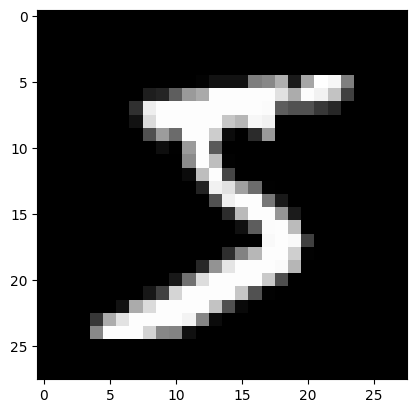

In [4]:
plt.imshow(train_images[0], cmap='gray')
print(train_labels[0])

In [5]:
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)


In [6]:
b = np.zeros((train_labels.size, train_labels.max()+1))
b[np.arange(train_labels.size), train_labels] = 1
train_labels = b

In [7]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# model definition

In [85]:
model = nn.MLP([784, 20, 15, 10])

ypred = model(train_images[0])
ypred = nn.softmax(ypred)


# training


In [86]:
import random

In [87]:
def random_batch(images, labels, batch_size):
    indexes = [random.randint(0, labels.shape[0]-1) for _ in range(batch_size)]
    for i in indexes:
        yield (images[i], labels[i])


In [88]:
def get_grad(val):
    return val.grad

for epoch in range(1):
    print(f'EPOCH: {epoch+1}')
    for i in range(10000):
        
        loss = Value(0.0)
        max_grad = []
        ypred = []
        N = 1
        
        for image, label in random_batch(train_images, train_labels, N):
           
            ypred = model(image)
            #print(["%.4f" % pred.data for pred in ypred])
            #print(np.array(model.parameters()).max())
            ypred = nn.softmax(ypred)
            loss += eval.RMSE(ypred, label)
            #print(["%.4f" % num for num in [yp.data for yp in ypred]])
            #print(f'actual: {np.argmax(np.array(label), axis=0)} prediction {np.argmax(ypred, axis=0)}')
            
            
        
        loss = (loss / N) + (.01 / N) * (np.array(model.parameters()).sum()**2) 
        model.zero_grad()
        loss.backward(.5)
        model.step(.02, False)
        #for x in ypred:
            #print(x.grad)
        if i % 500 == 0:
            print(f'loss: {loss}')

        
        

EPOCH: 1
loss: Value(1.107915594838952)
loss: Value(176.02892718475223)


KeyboardInterrupt: 

for image, label in random_batch(train_images, train_labels, 150):
    model.zero_grad()
            
    ypred = model(image)
    ypred = nn.softmax(ypred)
    loss = eval.CrossEntropy(ypred, label)
    before = loss.data
    
    loss.backward()
    model.step(.05)
    for y in ypred:
        print(y.grad)
    print(f'ypred{ypred}\n loss {loss}')
    

In [42]:
np.array(model.parameters()).max()

Value(0.2414710053782118)

In [20]:
sys.setrecursionlimit(100000)